In [92]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles


In [93]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

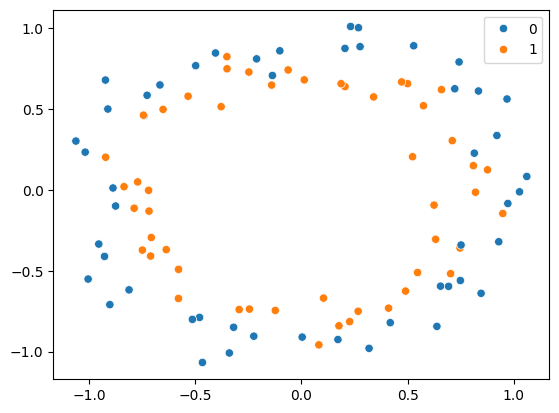

In [94]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [96]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

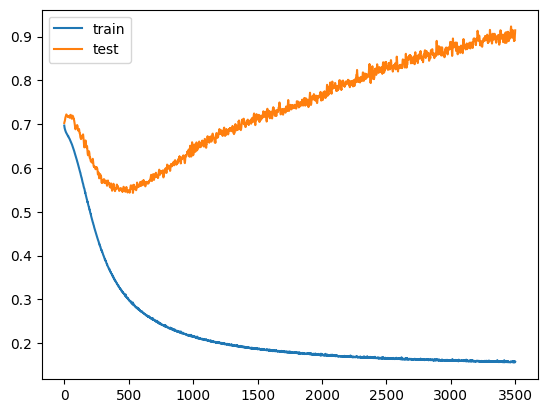

In [99]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


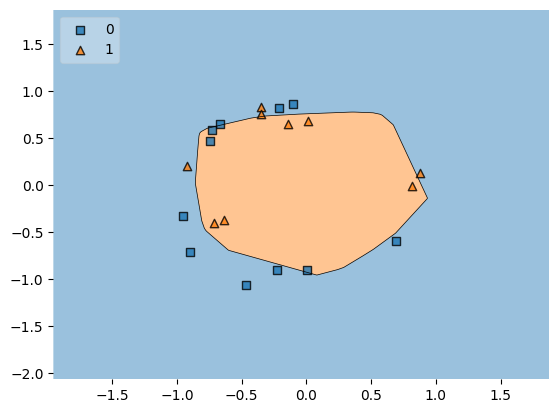

In [100]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [101]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [104]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.4711 - loss: 0.6923 - val_accuracy: 0.5500 - val_loss: 0.6941
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5492 - loss: 0.6897 - val_accuracy: 0.5500 - val_loss: 0.6953
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4969 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6984
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5766 - loss: 0.6874 - val_accuracy: 0.4500 - val_loss: 0.7006
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5383 - loss: 0.6868 - val_accuracy: 0.4000 - val_loss: 0.7025
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5102 - loss: 0.6858 - val_accuracy: 0.4000 - val_loss: 0.7046
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5359 - loss: 0.6816 - val_accuracy: 0.4000 - val_loss: 0.7055
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4867 - loss: 0.6877 - val_accuracy: 0.4000 - 